In [1]:
import numpy as np
from numpy import array,shape,transpose,dot
from numpy.linalg import inv,det
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x=array([[21,18],[23,16],[22,21],[24,20],[19,22],[26,31],[27,40],[29,39],[18,18],[20,18],[30,38],[28,35],[20,25],[27,30],[29,34],[27,36],[21,28],[30,25],[27,29],[28,29]])
y=array([[0,0,0,1,0,1,1,1,0,0,1,1,0,1,1,1,0,1,1,1]])
y=transpose(y)
print x,'\n',shape(x),'\n',y

[[21 18]
 [23 16]
 [22 21]
 [24 20]
 [19 22]
 [26 31]
 [27 40]
 [29 39]
 [18 18]
 [20 18]
 [30 38]
 [28 35]
 [20 25]
 [27 30]
 [29 34]
 [27 36]
 [21 28]
 [30 25]
 [27 29]
 [28 29]] 
(20, 2) 
[[0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]]


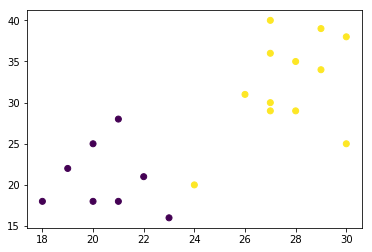

In [3]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [4]:
from __future__ import division
def phi(y):
    m=np.shape(y)[0]
    l=0;
    for i in range(0,m):
        if(y[i] == 1):
            l=l+1
    return float(l / m)

In [5]:
print float(phi(y))
p=phi(y)

0.6


In [6]:
def mean(x,y):
    m=np.shape(y)[0]
    n=np.shape(x)[1]
    t1=np.zeros((1,n))
    t2=np.zeros((1,n))
    s=0
    t=0
    for i in range(0,m):
        if(y[i] == 0):
            t1[0][0]=t1[0][0]+x[i][0]
            t1[0][1]=t1[0][1]+x[i][1]
            s=s+1
        else:
            t2[0][0]=t2[0][0]+x[i][0]
            t2[0][1]=t2[0][1]+x[i][1]
            t=t+1
    t1=transpose(t1)
    t2=transpose(t2)
    return t1/s,t2/t

In [7]:
print mean(x,y)

(array([[ 20.5 ],
       [ 20.75]]), array([[ 27.66666667],
       [ 32.16666667]]))


In [8]:
def cov1(x,y):
    m=np.shape(y)[0]
    
    r=x-transpose(mean(x,y)[0])
    return dot(transpose(r),r)/m

def cov2(x,y):
    m=np.shape(y)[0]
    
    r=x-transpose(mean(x,y)[1])
    return dot(transpose(r),r)/m
    

In [9]:

t1=mean(x,y)[0]
t2=mean(x,y)[1]

print t1,'\n',t2,'\n'

print cov1(x,y),'\n'
print cov2(x,y)
c1=cov1(x,y)
c2=cov2(x,y)

[[ 20.5 ]
 [ 20.75]] 
[[ 27.66666667]
 [ 32.16666667]] 

[[  33.35     51.375 ]
 [  51.375   103.7625]] 

[[ 23.07777778  35.01111111]
 [ 35.01111111  77.69444444]]


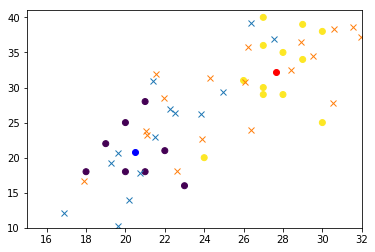

In [19]:
m1 = [20.5, 20.75]
m2 = [27.66666667, 32.16666667]
co1 =cov1(x,y) # diagonal covariance
co2 =cov2(x,y)
plt.scatter(x[:,0],x[:,1],c=y)
plt.scatter( mean(x,y)[0][0], mean(x,y)[0][1],c='b')
plt.scatter( mean(x,y)[1][0], mean(x,y)[1][1],c='r')
r, s = np.random.multivariate_normal(m1, co1, 20).T
u, v = np.random.multivariate_normal(m2, co2, 20).T
plt.axis([15,32,10,41])
plt.plot(r, s, 'x')
plt.plot(u, v, 'x')
plt.show()

In [14]:
def prob(x):
    l1=(1/((2*3.14)*(det(c1))))*( np.exp( (-(1/2)) * dot(dot(transpose(x-t1),inv(c1)),x-t1) ))
    l2=(1/((2*3.14)*(det(c2))))*( np.exp( (-(1/2))* dot(dot(transpose(x-t2),inv(c2)),x-t2)  ))
            
    return (l1*p)/((l1*p)+(l2*(1-p)))

In [15]:
l=array([[28],[35]])
print l

[[28]
 [35]]


In [16]:
print prob(l)

[[ 0.30095565]]
